In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

import fakeenvironment as fe

<Figure size 720x720 with 0 Axes>

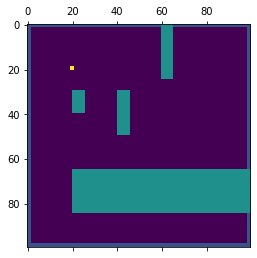

In [44]:
importlib.reload(fe)
e = fe.Environment(startpos=(20, 20), targetpos=(90, 60), N=100)
e.add_obstacle((65,85,20,100))
e.add_obstacle((0,25,60,65))
e.add_obstacle((30,40,20,26))
e.add_obstacle((30,50,40,46))
e.plot()

In [45]:
pos = []
rewards = []
for i in range(1000):
    a = e.random_action()
    s, r, done, info = e.step(a)
    pos.append(e.pos)
    rewards.append(r)
    if done:
        break

<Figure size 720x720 with 0 Axes>

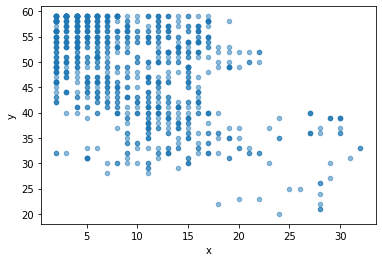

In [46]:
df = pd.DataFrame(pos)
df = df.reset_index(drop=False)
df.columns = ['index', 'x', 'y']

plt.figure(figsize=(10,10))
df.plot.scatter(x='x', y='y', alpha=0.5)

# for i, txt in enumerate(df.index):
#     ax.annotate(txt, (df.x.iat[i],df.y.iat[i]))
plt.show()